In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
data = pd.read_csv("hr_attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [53]:
aggregations = {
    'Age':['min','max'],
    'MonthlyIncome':['min','max']
}

a = data.groupby('Attrition',as_index=False).agg(aggregations)
a

Attrition Age     MonthlyIncome       
            min max           min    max
0        No  18  60          1051  19999
1       Yes  18  58          1009  19859

In [42]:
a.columns.ravel()

array([('Age', 'min'), ('Age', 'max')], dtype=object)

In [43]:
a

Age    
          min max
Attrition        
No         18  60
Yes        18  58

In [51]:
a.columns = ["_".join(x) for x in a.columns.ravel()]
a

,Attrition_,Age_min,Age_max
0,No,18,60
1,Yes,18,58


In [49]:
a['No']

KeyError: 'No'

data.info()

In [22]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,606,NaN,NaN,882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1024.865306,2.721769,NaN,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,NaN,602.024335,1.093082,NaN,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,491.250000,2.000000,NaN,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1020.500000,3.000000,NaN,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1555.750000,4.000000,NaN,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


###### Data Description

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [23]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,Research & Development,8,3,Medical,2068,2,Male,...,1,80,0,6,3,4,4,3,1,2


In [24]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Activity

## Attrition

###### Attrition in numbers (pandas)

Seaborn is a Python visualization library based on matplotlib. 
It provides a high-level interface for drawing attractive statistical graphics.

In [25]:
%matplotlib inline

In [26]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

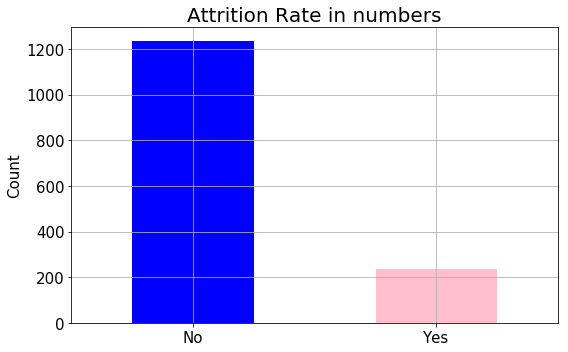

In [27]:
data.Attrition.value_counts().plot(kind='bar',
                                  figsize=(8,5),
                                  color=["blue","pink"],
                                  fontsize=10)

plt.title("Attrition Rate in numbers",fontsize=20)
plt.xticks(rotation=0, fontsize="15")
plt.yticks(fontsize='15')
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

###### Attrition rate in percentage (pandas)

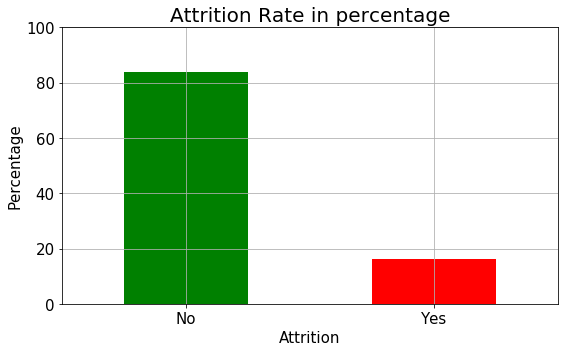

In [32]:
plt.figure()
((data.Attrition.value_counts()/sum(data.Attrition.value_counts()))*100).plot(kind='bar',
                                  figsize=(8,5),
                                  color=["green","red"],
                                  fontsize=16)

plt.ylim([0,100])
plt.title("Attrition Rate in percentage",fontsize=20)
plt.xlabel('Attrition',fontsize=15)
plt.xticks(rotation=0, fontsize="15")
plt.yticks(fontsize='15')
plt.ylabel('Percentage',fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

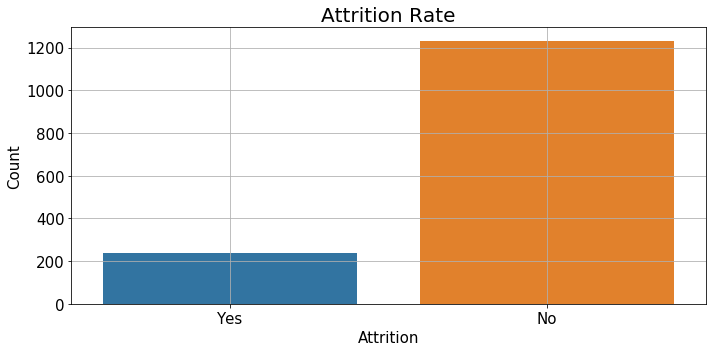

In [86]:
plt.figure(figsize = (10,5))
# Plot
sns.countplot(x='Attrition', data=data)
#              or 
#temp = pd.DataFrame(data.Attrition.value_counts())
#sns.barplot(temp.index,temp.Attrition,data=data)
plt.title("Attrition Rate",fontsize=20)

plt.xlabel('Attrition',fontsize=15)
plt.xticks(rotation=0, fontsize="15")

plt.yticks(fontsize='15')
plt.ylabel('Count',fontsize=15)

plt.tight_layout()
plt.grid()
plt.show()

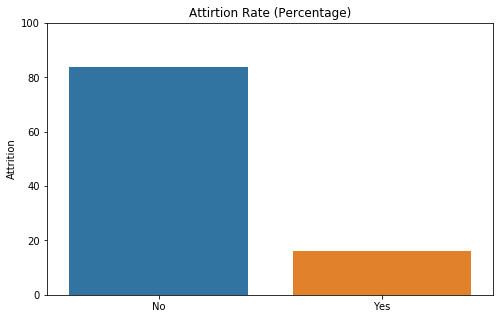

In [44]:
plt.figure(figsize = (8,5))

temp = pd.DataFrame((data.Attrition.value_counts()/sum(data.Attrition.value_counts()))*100)
sns.barplot(temp.index,temp.Attrition).set_title('Attirtion Rate (Percentage)')

#Setting y limits
plt.ylim([0,100])
plt.show()

### Gender Distribution in the company

In [36]:
data.groupby(['Attrition']).count()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


In [41]:
data.groupby(['Attrition']).size()

Attrition
No     1233
Yes     237
dtype: int64

In [40]:
data.groupby(['Attrition','Gender']).size()

Attrition  Gender
No         Female    501
           Male      732
Yes        Female     87
           Male      150
dtype: int64

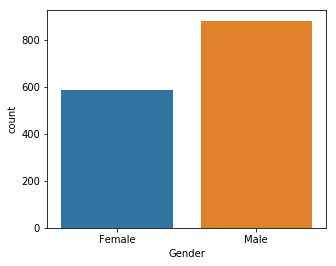

In [33]:
plt.figure(figsize = (5,4))
sns.countplot(x = data.Gender)
plt.show()

### Attrition and Gender

In [3]:
Gender_Attrition = hr_data.groupby(['Gender','Attrition']).size()

NameError: name 'hr_data' is not defined

In [1]:
Gender_Attrition


NameError: name 'Gender_Attrition' is not defined

In [67]:
Gender_Attrition = Gender_Attrition.unstack()


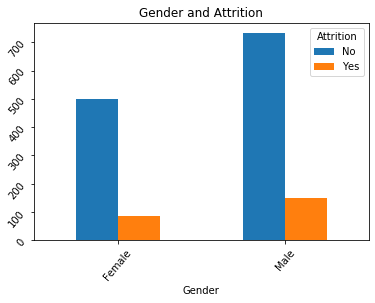

In [68]:
Gender_Attrition.plot(kind = 'bar')
plt.title('Gender and Attrition')
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()


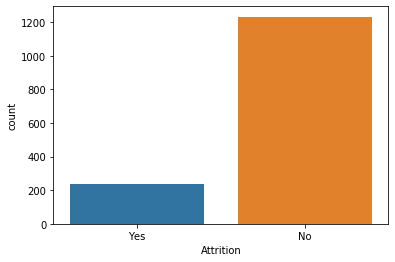

In [73]:
sns.countplot('Attrition',data=data)

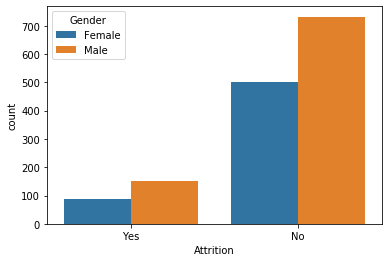

In [72]:
sns.countplot('Attrition',hue='Gender',data=data)

### Let us bin the age

In [100]:
data['Age_Bins'] = np.digitize(data.Age,[0,25,50],right=True)

In [106]:
distance_gender = data.groupby(['Age_Bins','Gender']).size().unstack()

In [108]:
#distance_gender = data.groupby(['Age_Bins','Gender']).size().unstack().reset_index().set_index('Age_Bins')

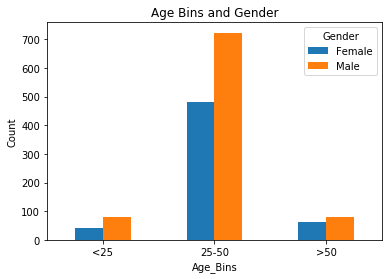

In [111]:
distance_gender.plot(kind= 'bar',stacked=False)
plt.title('Age Bins and Gender')
plt.xticks([0,1,2],["<25","25-50",">50"],rotation = 0)

plt.ylabel('Count')
plt.show()

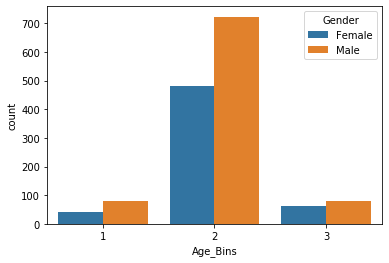

In [114]:
sns.countplot('Age_Bins',hue='Gender',data=data)

### Stacked bar chart 

###### Employee Attrition by Work Life Balance.

In [122]:
data.groupby(['WorkLifeBalance','Attrition']).size().unstack()

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


In [116]:
ct

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


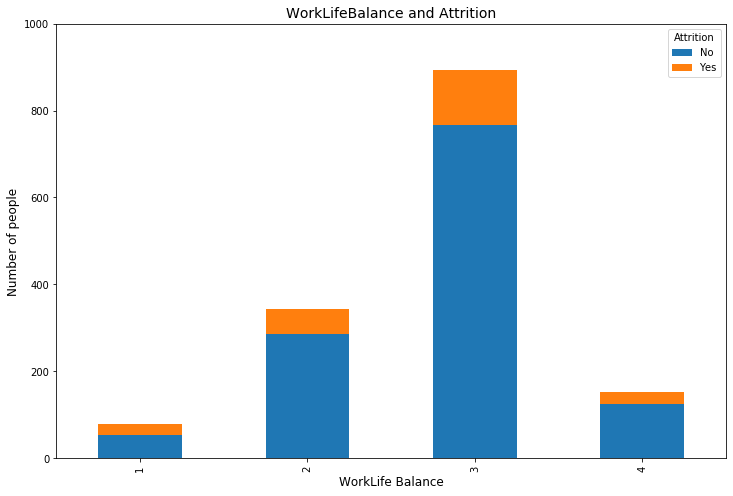

In [125]:
ct = pd.crosstab(data.WorkLifeBalance, data.Attrition)

ct.plot(kind='bar',stacked=True,figsize = (12,8))

plt.title('WorkLifeBalance and Attrition',fontsize = 14)
plt.xlabel('WorkLife Balance',fontsize = 12)
plt.ylabel('Number of people',fontsize = 12)

plt.legend(title='Attrition')
plt.ylim(0,1000)
plt.show()

In [126]:
#unfortunately no stacked bar plots available in seaborn

## OverTime and Performance Rating

In [130]:
data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

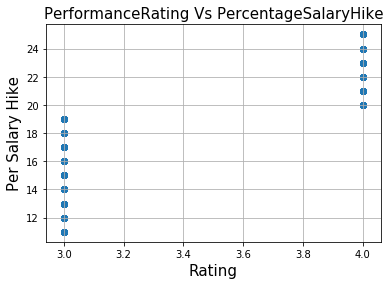

In [133]:
plt.figure()
plt.scatter(data.PerformanceRating,data.PercentSalaryHike)
plt.title("PerformanceRating Vs PercentageSalaryHike",fontsize=15)

plt.xlabel('Rating',fontsize=15)
plt.xticks(rotation=0, fontsize="10")

plt.yticks(fontsize='10')
plt.ylabel('Per Salary Hike',fontsize=15)
plt.grid()
plt.show()

In [136]:
perf_hike = data.groupby(['PerformanceRating','PercentSalaryHike','Attrition']).size().unstack()

In [153]:
perf_hike

Attrition                             No  Yes
PerformanceRating PercentSalaryHike          
3                 11                 169   41
                  12                 165   33
                  13                 175   34
                  14                 177   24
                  15                  83   18
                  16                  64   14
                  17                  68   14
                  18                  76   13
                  19                  67    9
4                 20                  48    7
                  21                  43    5
                  22                  44   12
                  23                  22    6
                  24                  15    6
                  25                  17    1

In [138]:
perf_hike.iloc[:,1]

PerformanceRating  PercentSalaryHike
3                  11                   41
                   12                   33
                   13                   34
                   14                   24
                   15                   18
                   16                   14
                   17                   14
                   18                   13
                   19                    9
4                  20                    7
                   21                    5
                   22                   12
                   23                    6
                   24                    6
                   25                    1
Name: Yes, dtype: int64

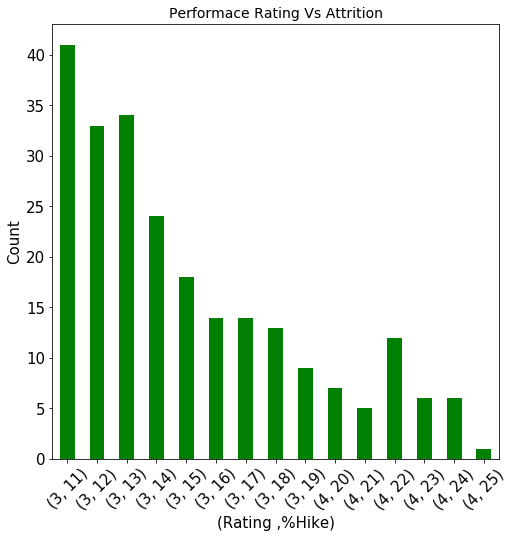

In [165]:
fig, ax = plt.subplots(figsize = (8,8))
perf_hike.iloc[:,1].plot(kind = 'bar',stacked = True,color = 'g')
plt.title('Performace Rating Vs Attrition(yes)',fontsize = 14)

plt.xlabel('(Rating ,%Hike)',fontsize=15)
plt.xticks(rotation=45, fontsize="15")

plt.yticks(fontsize='15')
plt.ylabel('Count',fontsize=15)
plt.show()


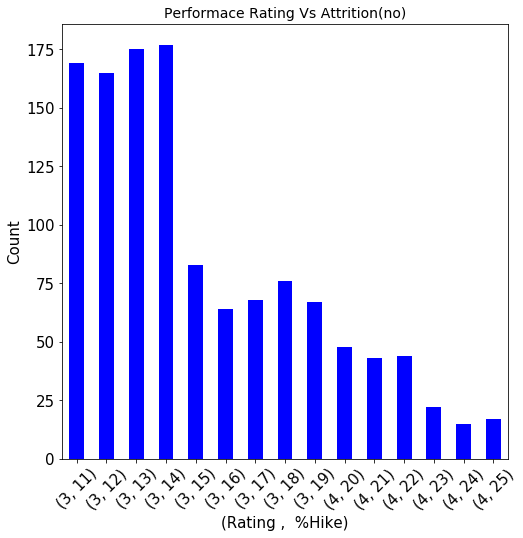

In [170]:
fig, ax = plt.subplots(figsize = (8,8))
perf_hike.iloc[:,0].plot(kind = 'bar',stacked = True,color = 'b')

plt.title('Performace Rating Vs Attrition(no)',fontsize = 14)

plt.xlabel('(Rating ,  %Hike)',fontsize=15)
plt.xticks(rotation=45, fontsize="15")

plt.yticks(fontsize='15')
plt.ylabel('Count',fontsize=15)
plt.show()



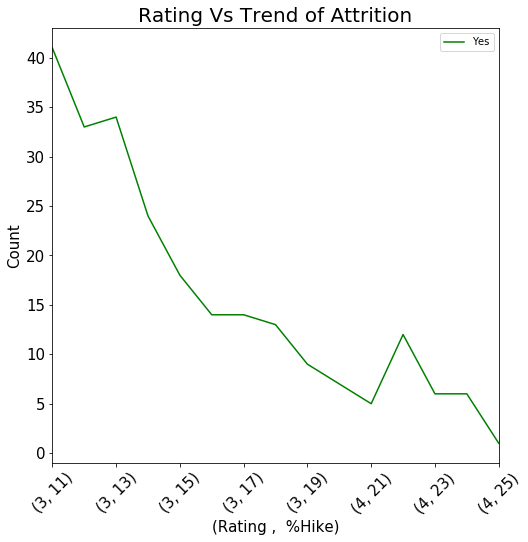

In [172]:
fig, ax = plt.subplots(figsize = (8,8))
perf_hike.iloc[:,1].plot(kind = 'line',color = 'g')
#perf_hike.iloc[:,0].plot(kind = 'line',color = 'b')
plt.title('Rating Vs Trend of Attrition',fontsize = 20)

plt.xlabel('(Rating ,  %Hike)',fontsize=15)
plt.xticks(rotation=45, fontsize="15")

plt.yticks(fontsize='15')
plt.ylabel('Count',fontsize=15)
plt.legend()
plt.show()



More attrition among the employees who got less hike

### Age

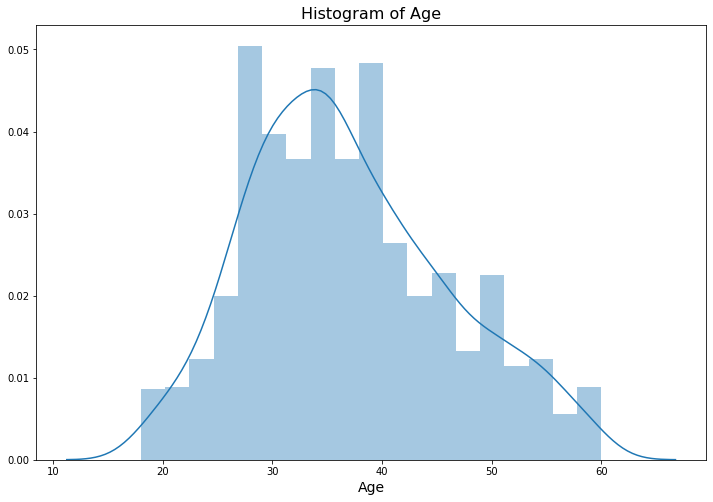

In [151]:
plt.figure(figsize = (12,8))
b = sns.distplot(data.Age)
b.set_title('Histogram of Age',fontsize = 16)
b.set_xlabel("Age",fontsize=14)
plt.show()

## Years at company and Attrition

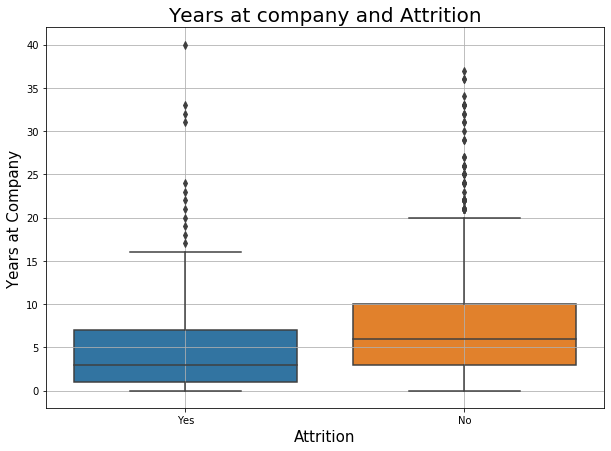

In [155]:
plt.figure(figsize = (10,7))

sns.boxplot(data.Attrition,data.YearsAtCompany)
plt.title('Years at company and Attrition',fontsize=20)
plt.xlabel('Attrition',fontsize=15)
plt.ylabel('Years at Company',fontsize=15)
plt.grid()
plt.show()


## Years at company and Age

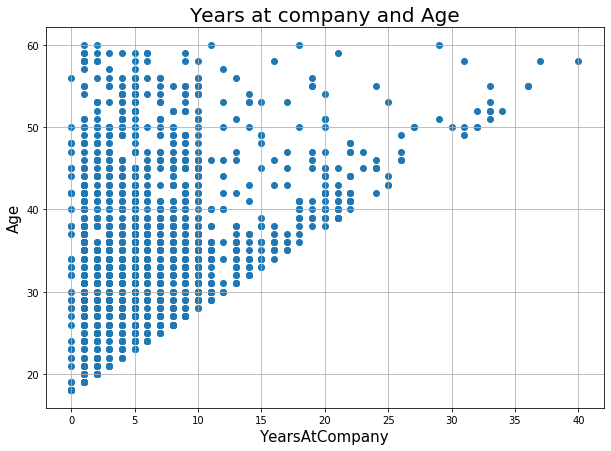

In [157]:
plt.figure(figsize = (10,7))

plt.scatter(x = data.YearsAtCompany,y = data.Age)
plt.title('Years at company and Age',fontsize=20)
plt.xlabel('YearsAtCompany',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.grid()
plt.show()


### Monthly income vs Attrition vs Age

In [159]:
color_seq = []
for i in data.Attrition:
    if i =='Yes':
        color_seq.append('red')
    else:
        color_seq.append('green')

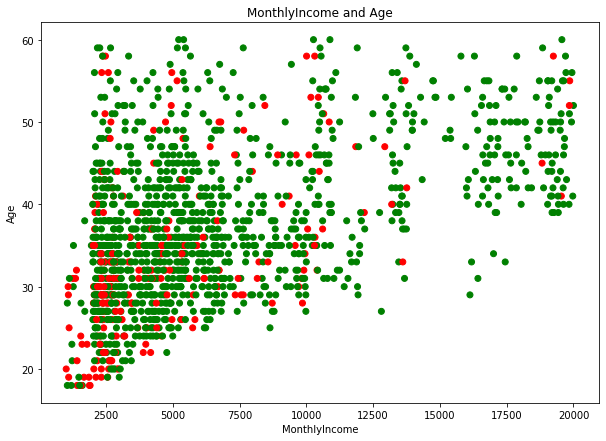

In [161]:
plt.figure(figsize = (10,7))
plt.scatter(x = data.MonthlyIncome,y = data.Age,color = color_seq)
plt.title('MonthlyIncome and Age')
plt.xlabel('MonthlyIncome')
plt.ylabel('Age')
plt.show()

In [173]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Bins
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,80,0,8,0,1,6,4,0,5,2
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,80,1,10,3,3,10,7,1,7,2
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,80,0,7,3,3,0,0,0,0,2
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,80,0,8,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,80,1,6,3,3,2,2,2,2,2


In [176]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age_Bins'],
      dtype='object')

In [184]:
age_attrition = data.groupby(['Age','Attrition']).size().unstack()

In [187]:
age_attrition.head()

Attrition,No,Yes
Age,,
18,4.0,4.0
19,3.0,6.0
20,5.0,6.0
21,7.0,6.0
22,11.0,5.0


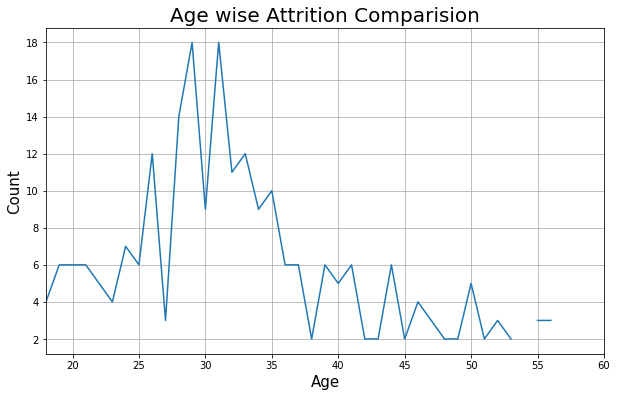

In [194]:
plt.figure(figsize=(10,6))
age_attrition.iloc[:,1].plot(kind='line')
plt.title('Age wise Attrition Comparision',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid()
plt.show()

In [200]:
attrition_bt = pd.crosstab(data['Attrition'],data['BusinessTravel'])
attrition_bt

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


In [205]:
attrition_bt = data.groupby(['BusinessTravel','Attrition']).size().unstack()

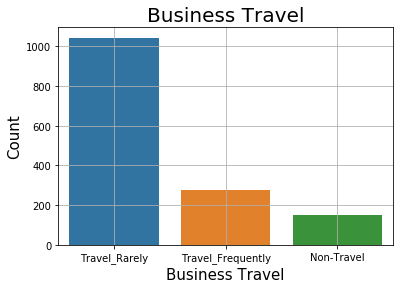

In [209]:
sns.countplot(data['BusinessTravel'])
plt.title('Business Travel',fontsize=20)
plt.xlabel('Business Travel',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.grid()
plt.show()

In [213]:
data.groupby(['Department']).size()

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64